# DATA DESCRIPTION

1. age -age in years
 2. sex- (1=male;0=female)
3. chest pain type (4 values)
 4. resting blood pressure
5. serum cholestoral in mg/dl
 6. fasting blood sugar>120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
 8. maximum heart rate achieved
9. exercise induced angina
 10. oldpeak=ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
 12. number of major vessels (0-3) colored by flourosopy
13. thal:0=normal;1=fixed defect;2=reversable defect
 14. target-have disease or not (1=yes, 03DD0) (= the predicted attribute)  


# Importing the require Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read the dataset
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#check the missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.target.value_counts()

1    526
0    499
Name: target, dtype: int64

# Splitting The Dataset Into The Training Set And Test Set

In [7]:
X = data.drop('target',axis=1)

In [8]:
y=data['target']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=0)

In [11]:
y_test

807    1
27     0
77     0
406    1
886    0
      ..
464    1
25     0
110    0
149    1
152    0
Name: target, Length: 820, dtype: int64

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\JUI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred = log.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test)*100)

82.5609756097561


# VISUALIZATION

Text(0.5, 1.0, 'Count Heart diesease')

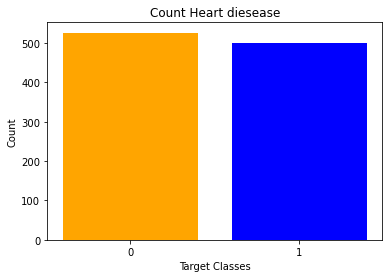

In [16]:
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['orange', 'blue'])
plt.xticks([0,1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count Heart diesease')

In [17]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


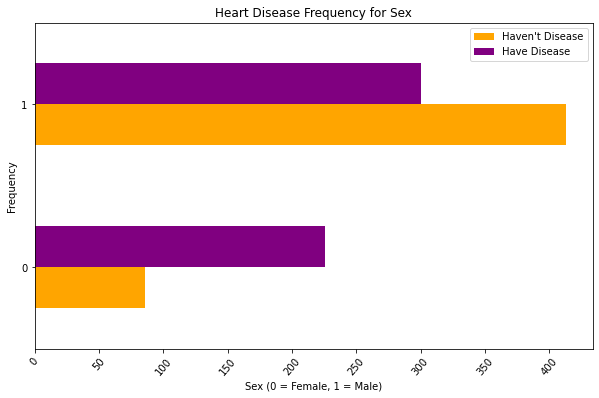

In [18]:
pd.crosstab(data.sex,data.target).plot(kind="barh",figsize=(10,6),color=['orange','purple' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=50)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

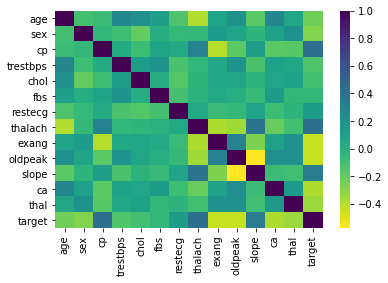

In [19]:
sns.heatmap(data.corr(),cmap='viridis_r')

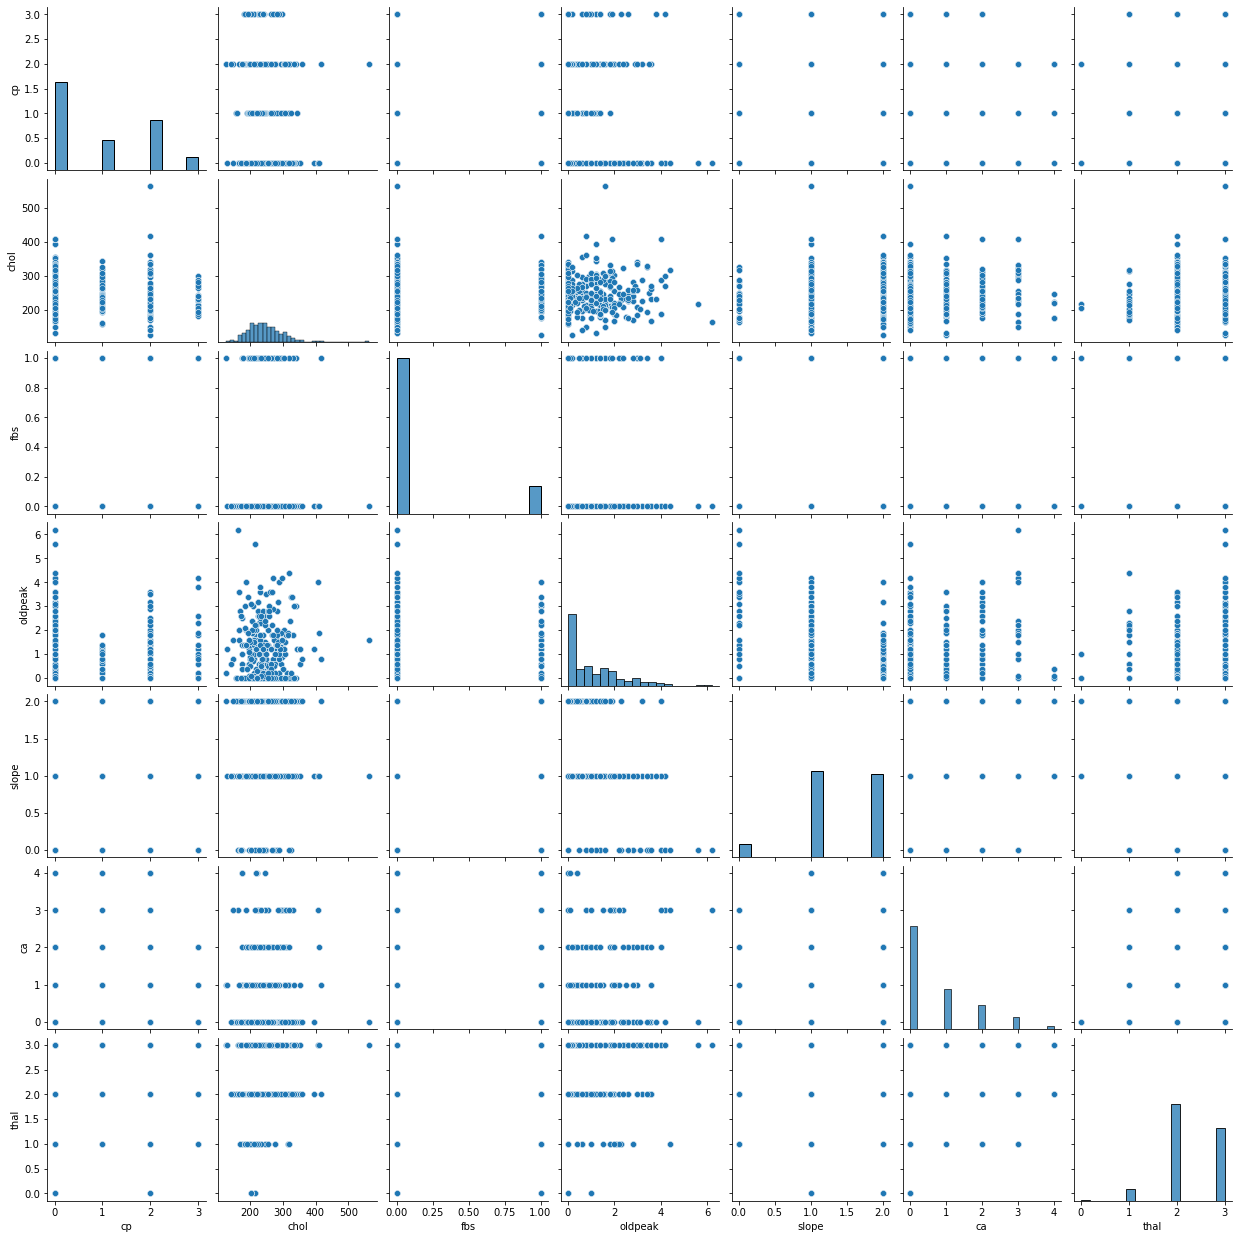

In [20]:
cols = ['cp','chol','fbs','oldpeak','slope','ca','thal']
sns.pairplot(data[cols])
sns.set_palette('summer_r')

In [21]:
# Rename the colums for better visualization

In [22]:
data = data.rename(columns = {'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 'chol': 'cholesterol','fbs': 'fasting_blood_sugar', 
                       'restecg' : 'rest_electrocardiographic', 'thalach': 'max_heart_rate_achieved', 'exang': 'exercise_induced_angina',
                       'oldpeak': 'st_depression', 'slope': 'st_slope', 'ca':'num_major_vessels', 'thal': 'thalassemia'}, errors="raise")

In [23]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_electrocardiographic'][data['rest_electrocardiographic'] == 0] = 'normal'
data['rest_electrocardiographic'][data['rest_electrocardiographic'] == 1] = 'ST-T wave abnormality'
data['rest_electrocardiographic'][data['rest_electrocardiographic'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'normal'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

<ipython-input-23-29c113cddb00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'][data['sex'] == 0] = 'female'
<ipython-input-23-29c113cddb00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
<ipython-input-23-29c113cddb00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/

In [24]:
cat_feats=('sex','chest_pain_type','rest_electrocardiographic','st_slope','thalassemia','exercise_induced_angina','fasting_blood_suger')

In [25]:
mypal= ['#fc047f', '#640164', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']

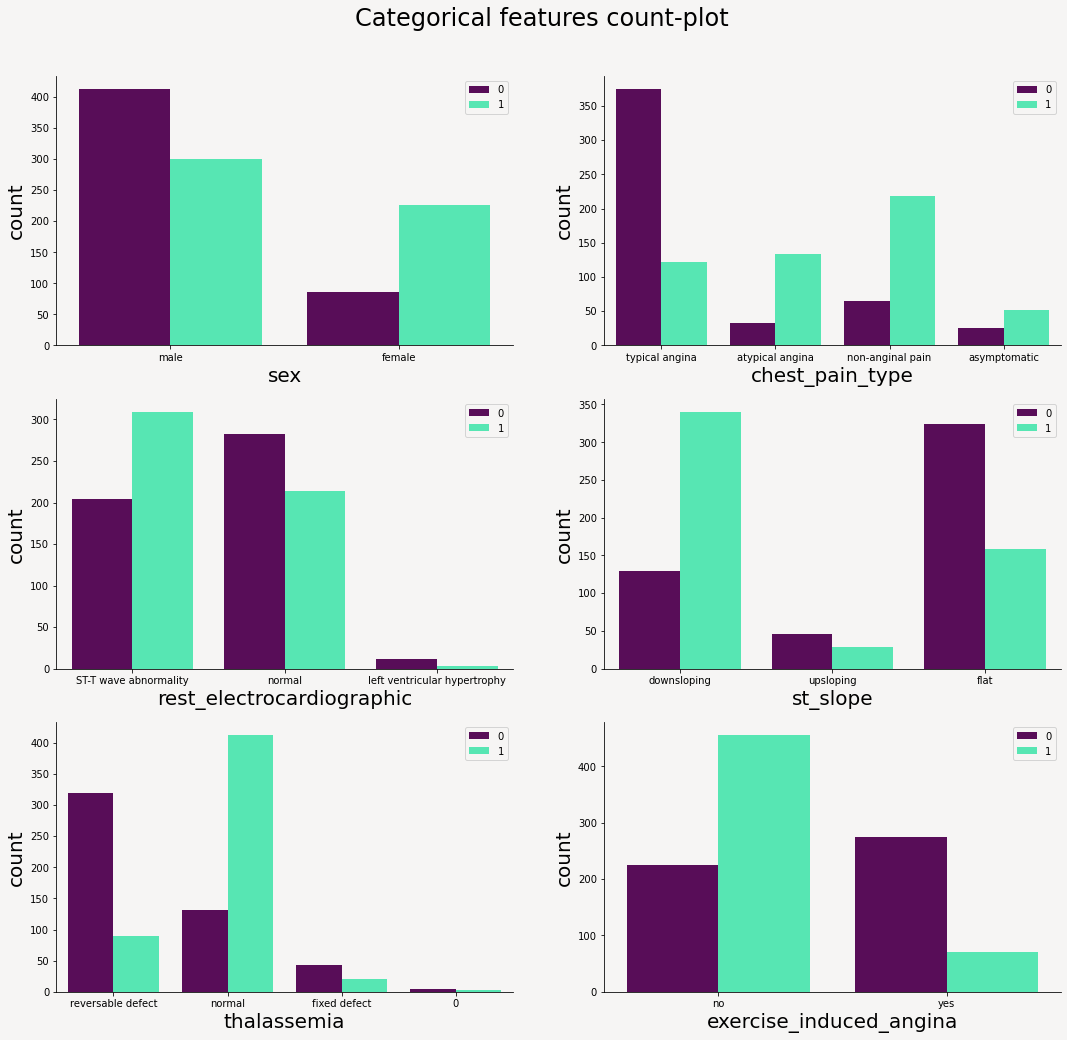

In [26]:
def hist_plot(data, cat_feats):    
    L = len(cat_feats)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 16), facecolor='#F6F5F4')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in cat_feats:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        g = sns.countplot(data=data, x=col, hue="target",palette=mypal[1::4])
        g.set_xlabel(col, fontsize=20)
        g.set_ylabel("count", fontsize=20)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F4')
        i = i +1

    plt.suptitle('Categorical features count-plot' ,fontsize = 24)
    return 0
hist_plot(data, cat_feats[0:-1]);

# Add GUI  (Graphical User Interface)

In [ ]:
# use GUI for better communicate with the dataset

In [ ]:
import pickle    
Model = pickle.dumps(model)  

In [ ]:
from tkinter import *

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    Model = pickle.dumps(model) 
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(layout, text="No Heart Disease").grid(row=31)
    else:
        Label(layout, text="Possibility of Heart Disease").grid(row=31)
        
        
layout = Tk()
layout.title("Heart Disease Prediction System")


label = Label(layout, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=3)


Label(layout, text="Enter Your Age").grid(row=1)
Label(layout, text="Male Or Female [1/0]").grid(row=2)
Label(layout, text="Enter Value of CP").grid(row=3)
Label(layout, text="Enter Value of trestbps").grid(row=4)
Label(layout, text="Enter Value of chol").grid(row=5)
Label(layout, text="Enter Value of fbs").grid(row=6)
Label(layout, text="Enter Value of restecg").grid(row=7)
Label(layout, text="Enter Value of thalach").grid(row=8)
Label(layout, text="Enter Value of exang").grid(row=9)
Label(layout, text="Enter Value of oldpeak").grid(row=10)
Label(layout, text="Enter Value of slope").grid(row=11)
Label(layout, text="Enter Value of ca").grid(row=12)
Label(layout, text="Enter Value of thal").grid(row=13)

e1 = Entry(layout)
e2 = Entry(layout)
e3 = Entry(layout)
e4 = Entry(layout)
e5 = Entry(layout)
e6 = Entry(layout)
e7 = Entry(layout)
e8 = Entry(layout)
e9 = Entry(layout)
e10 = Entry(layout)
e11 = Entry(layout)
e12 = Entry(layout)
e13 = Entry(layout)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)


Button(layout, text='Predict', command=show_entry_fields).grid()

mainloop()  

# CONCLUSION

We did summarize and analyze the dataset, visualize the target values and another feratures also
to understand the data,Check the accuracy. 
We Add GUI for user can input their data and get the possible result.